In [41]:
from math import sqrt
from scipy.stats import norm
from scipy.stats import invgamma
import numpy as np
from scipy.stats import gaussian_kde
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 1
Implement a Gibbs sampler for the exam scores problem.

In [44]:
def gibbs(y, nu, tau2, alpha, beta, n_samples):
    """
    Assuming a likelihood and priors
    y_i ~ N(mu, sigma2),
    mu ~ N(nu, tau2),
    sigma2 ~ IG(alpha, beta),
    sample from the posterior distribution
    P(mu, sigma2 | y, nu, tau2, alpha, beta)
    using a gibbs sampler.
    Parameters
    ----------
    y : ndarray of shape (N,)
    The data
    nu : float
    The prior mean parameter for mu
    tau2 : float > 0
    The prior variance parameter for mu
    alpha : float > 0
    The prior alpha parameter for sigma2
    beta : float > 0
    The prior beta parameter for sigma2
    n_samples : int
    The number of samples to draw
    Returns
    -------
    samples : ndarray of shape (n_samples,2)
    1st col = mu samples, 2nd col = sigma2 samples
    """
    N = len(y)
    samples = np.zeros((n_samples+1, 2))
    mu = norm.rvs(nu, scale = np.sqrt(tau2))#, size = n_samples )
    sigma2 = invgamma.rvs(alpha, scale = beta)#, size = n_samples)
    samples[0,0], samples[0, 1] = mu, sigma2
    
    for k in xrange(n_samples):
        #for i in xrange(N):
        mu = samples[k, 0]
        sigma2 = samples[k, 1]
        
        sigma2_star = 1./( (1./tau2) + (N/sigma2) )
        mu_star = sigma2_star*( (nu/tau2) + (1./sigma2) * np.sum(y))
        alpha_star = alpha + N/2.
        beta_star = beta + (1./2) * np.sum((y - mu)**2)
        
        samples[k+1, 0] = norm.rvs(mu_star, scale = np.sqrt(sigma2_star))
        samples[k+1, 1] = invgamma.rvs(alpha_star, scale = beta_star)
        
    return samples[1:]

Loading exam score data

In [43]:
y = np.loadtxt('examscores.csv', delimiter = ',')

Testing with priors $\nu$ = 80, $\tau^2$ = 16, $\alpha$ = 3, $\beta$ = 50, collecting 1000 samples of $\mu$ and your samples of $\sigma^2$

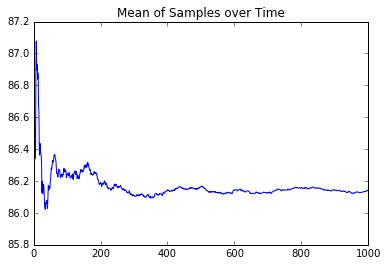

In [57]:
nu, tau2, alpha, beta, n_samples = 80., 16., 3., 50., 1000
samples = gibbs(y, nu, tau2, alpha, beta, n_samples)
mean = [samples[:i, 0].mean() for i in range(999)]
plt.title('Mean of Samples over Time')
plt.plot(mean)
plt.show()

## Problem 2
Plot the kernel density estimators for the posterior distributions of $\mu$ and $\sigma^2$.

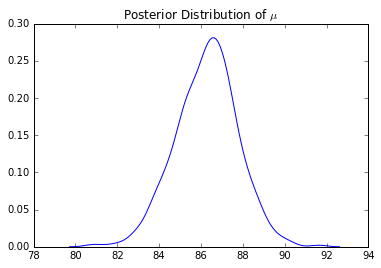

In [50]:
mu_kernel = gaussian_kde(samples[:, 0])
x_min = min(samples[:, 0]) - 1
x_max = max(samples[:, 0]) + 1
x = np.arange(x_min, x_max, step=0.1)
plt.plot(x,mu_kernel(x))
plt.title('Posterior Distribution of $\mu$')
plt.show()

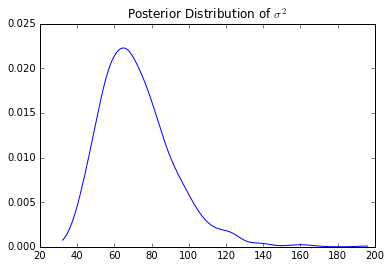

In [52]:
mu_kernel = gaussian_kde(samples[:, 1])
x_min = min(samples[:, 1]) - 1
x_max = max(samples[:, 1]) + 1
x = np.arange(x_min, x_max, step=0.1)
plt.plot(x,mu_kernel(x))
plt.title('Posterior Distribution of $\sigma^2$')
plt.show()

## Problem 3
Use your samples of $\mu$ and $\sigma^2$ to draw samples from the posterior predictive distribution. Plot the kernel density estimator of your sampled scores.

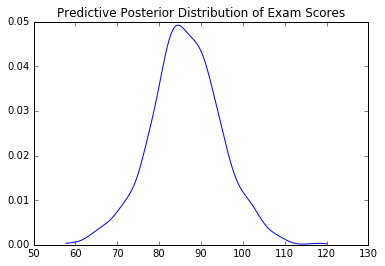

In [54]:
predict = np.zeros(1000)
for i in range(len(predict)):
    predict[i] = norm.rvs(samples[i, 0], scale = np.sqrt(samples[i, 1]))
kernel = gaussian_kde(predict)
x_min = min(predict) - 1
x_max = max(predict) + 1
x = np.arange(x_min, x_max, step = 0.1)
plt.plot(x, kernel(x))
plt.title('Predictive Posterior Distribution of Exam Scores')
plt.show()